<a href="https://colab.research.google.com/github/tejaswi8985/AIML-2320030069/blob/main/AIML%20LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shortest path from A to J: A -> F -> G -> I -> J
Total cost: 10


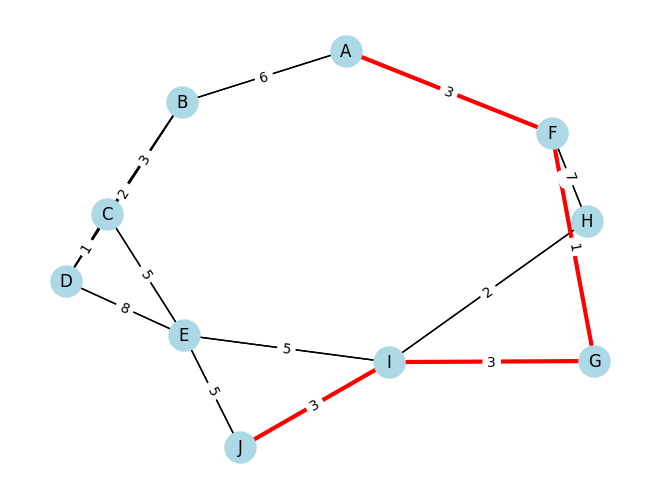

In [ ]:
#A_search
import networkx as nx
import heapq
import matplotlib.pyplot as plt

def create_graph():
    G = nx.Graph()
    edges = [
        ('A', 'B', 6), ('A', 'F', 3),
        ('B', 'C', 3), ('B', 'D', 2),
        ('C', 'D', 1), ('C', 'E', 5),
        ('D', 'E', 8),
        ('E', 'I', 5), ('E', 'J', 5),
        ('F', 'G', 1), ('F', 'H', 7),
        ('G', 'I', 3),
        ('H', 'I', 2),
        ('I', 'J', 3)
    ]
    G.add_weighted_edges_from(edges)

    # Add heuristic values
    heuristics = {
        'A': 10, 'B': 8, 'C': 5, 'D': 7,
        'E': 3, 'F': 6, 'G': 5, 'H': 3,
        'I': 1, 'J': 0
    }
    nx.set_node_attributes(G, heuristics, 'heuristic')

    return G

def heuristic(node, goal, G):
    return G.nodes[node]['heuristic']

def astar(graph, start, goal):
    frontier = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}

    while frontier:
        current_cost, current_node = heapq.heappop(frontier)

        if current_node == goal:
            break

        for next_node in graph.neighbors(current_node):
            new_cost = cost_so_far[current_node] + graph[current_node][next_node]['weight']
            if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                cost_so_far[next_node] = new_cost
                priority = new_cost + heuristic(next_node, goal, graph)
                heapq.heappush(frontier, (priority, next_node))
                came_from[next_node] = current_node

    # Reconstruct path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path, cost_so_far[goal]

def display_graph_and_path(graph, path):
    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'weight')

    # Draw nodes
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='lightblue')

    # Draw edges
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), width=1)

    # Highlight path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, width=3, edge_color='r')

    # Draw edge weights
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    plt.show()

# Create the graph
G = create_graph()

# Run A* algorithm
start_node = 'A'
goal_node = 'J'
path, cost = astar(G, start_node, goal_node)

print(f"Shortest path from {start_node} to {goal_node}: {' -> '.join(path)}")
print(f"Total cost: {cost}")

# Display the graph and the path found
display_graph_and_path(G, path)


In [ ]:
#bfs
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = []
queue = []

def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)

    while queue:
        s = queue.pop(0)
        print(s, end = " ")

        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

print("Following is the Breadth-First Search")
bfs(visited, graph, '7')

Following is the Breadth-First Search
7 8 

In [ ]:
#dfs
graph = {
    'a' : ['b', 'c'],
    'b' : ['d', 'e'],
    'c' : ['f'],
    'd' : [],
    'e' : ['f'],
    'f' : []
}

visited = []
queue = []

def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0)
    print(s, end = " ")

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

print("Following is the Breadth-First Search")
bfs(visited, graph, 'a')

Following is the Breadth-First Search
a b c d e f 

In [ ]:
graph = {
    'A' : ['B','C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}

visited = set()

def dfs(visited, graph, node):
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

print("Following is the Depth-First Search")
dfs(visited, graph, 'A')

Following is the Depth-First Search
A
B
D
E
F
C


In [ ]:
#iddfs
def dfs_limited(graph, node, target, depth, visited=None):
    if visited is None:
        visited = set()

    visited.add(node)

    # If target is found, return True
    if node == target:
        return True

    # If depth limit reached, return False
    if depth <= 0:
        return False

    # Recur for all adjacent vertices
    for neighbor in graph[node]:
        if neighbor not in visited:
            if dfs_limited(graph, neighbor, target, depth - 1, visited):
                return True

    return False

def iterative_deepening_search(graph, start, target, max_depth):
    for depth in range(max_depth + 1):
        print(f"Searching at depth: {depth}")
        visited = set()
        if dfs_limited(graph, start, target, depth, visited):
            print(f"Target {target} found at depth {depth}")
            return True
    print(f"Target {target} not found within depth {max_depth}")
    return False

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

print("Iterative Deepening Search starting from node 'A':")
iterative_deepening_search(graph, 'A', 'F', 3)

Iterative Deepening Search starting from node 'A':
Searching at depth: 0
Searching at depth: 1
Searching at depth: 2
Target F found at depth 2


True

In [ ]:
#A* with priority queue

from queue import PriorityQueue

def a_star(graph, start, goal, h):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    while not open_set.empty():
        _, current = open_set.get()

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor, cost in graph[current].items():
            tentative_g_score = g_score[current] + cost

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + h[neighbor]
                open_set.put((f_score, neighbor))

    return None

# Example usage with a different graph
graph_a_star = {
    'A': {'B': 2, 'C': 3},
    'B': {'A': 2, 'D': 4, 'E': 7},
    'C': {'A': 3, 'F': 1},
    'D': {'B': 4},
    'E': {'B': 7, 'F': 2, 'G': 3},
    'F': {'C': 1, 'E': 2},
    'G': {'E': 3}
}
heuristics_a_star = {
    'A': 10,
    'B': 8,
    'C': 5,
    'D': 7,
    'E': 3,
    'F': 2,
    'G': 0
}

print("A* path:", a_star(graph_a_star, 'A', 'G', heuristics_a_star))


A* path: ['A', 'C', 'F', 'E', 'G']


In [ ]:
#Min Max

def minimax(depth, node_index, maximizing_player, values, alpha, beta):
    if depth == 3:
        return values[node_index]

    if maximizing_player:
        best = float('-inf')
        for i in range(2):
            val = minimax(depth + 1, node_index * 2 + i, False, values, alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)

            if beta <= alpha:
                break
        return best
    else:
        best = float('inf')
        for i in range(2):
            val = minimax(depth + 1, node_index * 2 + i, True, values, alpha, beta)
            best = min(best, val)
            beta = min(beta, best)

            if beta <= alpha:
                break
        return best

# Example usage with a different set of values
values_minimax = [15, 25, 10, 5, 18, 20, 3, 12]
print("Optimal value:", minimax(0, 0, True, values_minimax, float('-inf'), float('inf')))


Optimal value: 12


In [ ]:
#Bidirectional

import networkx as nx

def bidirectional_search(G, start, goal):
    forward = {start: None}
    backward = {goal: None}

    while forward and backward:
        if set(forward.keys()) & set(backward.keys()):
            return True

        forward = {v: u for u in forward for v in G[u] if v not in forward}
        backward = {v: u for u in backward for v in G[u] if v not in backward}

    return False

# Example usage
'''G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,4), (4,5)])
print(bidirectional_search(G, 1, 5))'''

G = nx.Graph()
G.add_edges_from([
    (1, 2), (2, 3), (3, 4), (4, 5),
    (1, 6), (6, 7), (7, 8), (8, 9),
    (5, 9), (3, 7)
])
print(bidirectional_search(G, 1, 9))

True


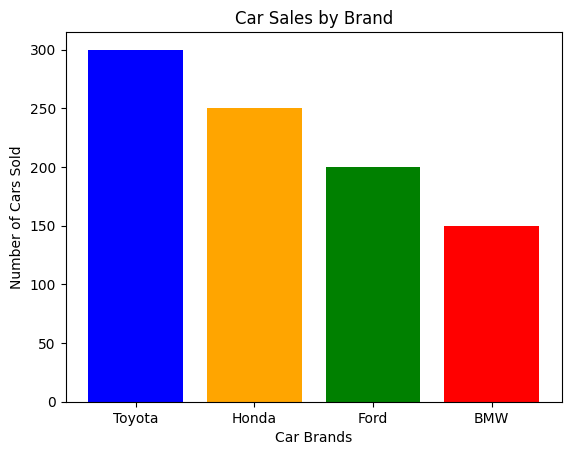

In [ ]:
#Bar graph

import matplotlib.pyplot as plt

# Data for the bar graph
car_brands = ['Toyota', 'Honda', 'Ford', 'BMW']
sales = [300, 250, 200, 150]

# Creating the bar graph
plt.bar(car_brands, sales, color=['blue', 'orange', 'green', 'red'])

# Adding labels and title
plt.xlabel('Car Brands')
plt.ylabel('Number of Cars Sold')
plt.title('Car Sales by Brand')

# Display the graph
plt.show()


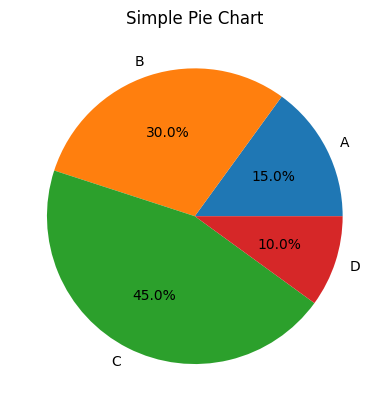

In [ ]:
#Pie chart

import matplotlib.pyplot as plt

# Simple data for the pie chart
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]

# Creating the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Adding a title
plt.title('Simple Pie Chart')

# Display the chart
plt.show()


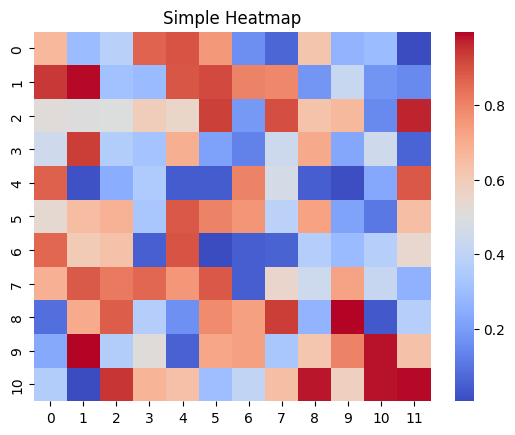

In [ ]:
#Heat map

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D array of random values
data = np.random.rand(11, 12)

# Create the heatmap
sns.heatmap(data, cmap='coolwarm')

# for title
plt.title('Simple Heatmap')
plt.show()